In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [14]:
train_data=[]
test_data=[]

for i in os.listdir(r'C:\Users\Waris Hayyat\Downloads\DogvsCat\dogs_cats_sample_1000\train'):
    print(i)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Waris Hayyat\\Downloads\\DogvsCat\\dogs_cats_sample_1000\\train'

In [15]:
!wget kaggle datasets download -d arnaudeq/cats-vs-dogs-1000

DEBUG output created by Wget 1.21.2 on linux-gnu.

Reading HSTS entries from /root/.wget-hsts
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2024-09-22 17:02:43--  http://kaggle/
Resolving kaggle (kaggle)... failed: Name or service not known.
wget: unable to resolve host address ‘kaggle’
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2024-09-22 17:02:43--  http://datasets/
Resolving datasets (datasets)... failed: Name or service not known.
wget: unable to resolve host address ‘datasets’
URI encoding = ‘UTF-8’
Converted file name 'index.html' (UTF-8) -> 'index.html' (UTF-8)
--2024-09-22 17:02:43--  http://download/
Resolving download (download)... failed: No address associated with hostname.
wget: unable to resolve host address ‘download’
URI encoding = ‘UTF-8’
Converted file name 'cats-vs-dogs-1000' (UTF-8) -> 'cats-vs-dogs-1000' (UTF-8)
--2024-09-22 17:02:43--  http://arnaudeq/cats-vs-dogs-1000
Resol

In [17]:
!kaggle datasets download -d arnaudeq/cats-vs-dogs-1000


Dataset URL: https://www.kaggle.com/datasets/arnaudeq/cats-vs-dogs-1000
License(s): unknown
 96% 169M/177M [00:01<00:00, 88.2MB/s]
100% 177M/177M [00:01<00:00, 93.8MB/s]


In [18]:
!unzip cats-vs-dogs-1000.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/cats/cat.9997.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/cats/cat.9999.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10007.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.1001.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10035.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10049.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10058.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10075.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10092.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10115.jpg  
  inflating: dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10116.jpg  
  inflating: dogs_cats_sampl

In [63]:
import os

input_path = []
labels = []
base_path = "/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train"

for classs in os.listdir(base_path):
    # Check if the class is 'cats' or 'dogs'
    if classs in ['cats', 'dogs']:
        class_path = os.path.join(base_path, classs)  # Full path to class directory

        for filename in os.listdir(class_path):
            # Create the full path to the image file
            img_path = os.path.join(class_path, filename)
            input_path.append(img_path)

            # Assign labels: 0 for cats, 1 for dogs
            if classs == 'cats':
                labels.append(0)
            elif classs == 'dogs':
                labels.append(1)


In [64]:
input_path

['/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.8005.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.625.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.9455.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.11041.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.11296.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.9325.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.8199.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.10612.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.9654.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.5480.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.3813.jpg',
 '/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats/cat.6770.jpg',
 '/content/dogs_cats_sampl

In [67]:
len(input_path)

2000

In [70]:
df=pd.DataFrame()

df["images"] = input_path
df["labels"] = labels

In [78]:
df["labels"]=df["labels"].astype("str")

In [85]:
cats=df[df['labels']=="0"]["images"].sample(25)
dogs=df[df['labels']=="1"]["images"].sample(25)

In [88]:
dogs.iloc[0]

'/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/dogs/dog.4633.jpg'

# Doing some eda

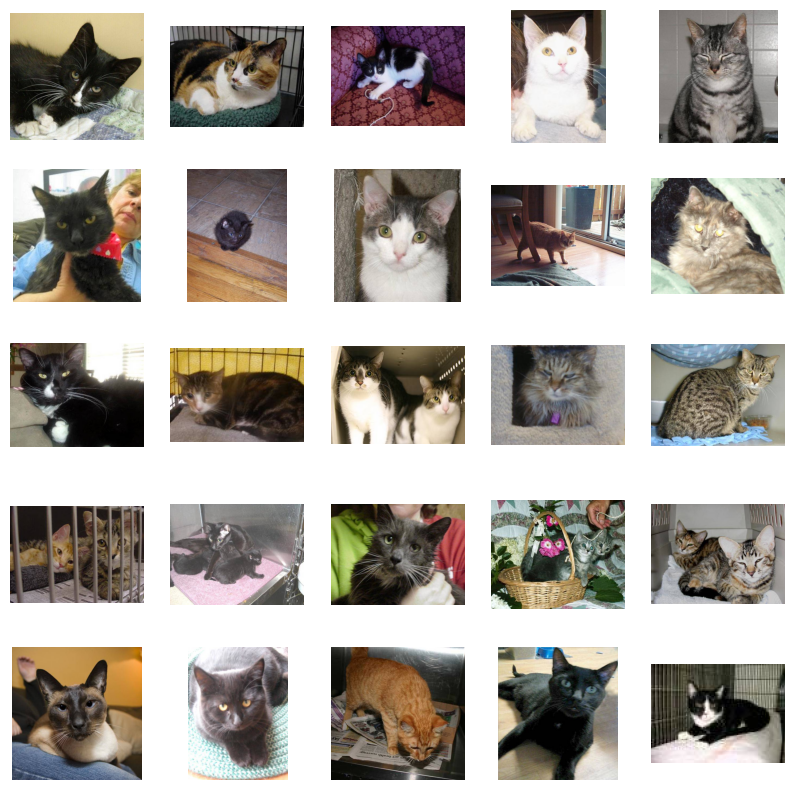

In [89]:
plt.subplots(figsize=(10,10))
for i in range(len(cats)):
    plt.subplot(5,5,i+1)
    img=plt.imread(cats.iloc[i])
    plt.imshow(img)
    plt.axis("off")

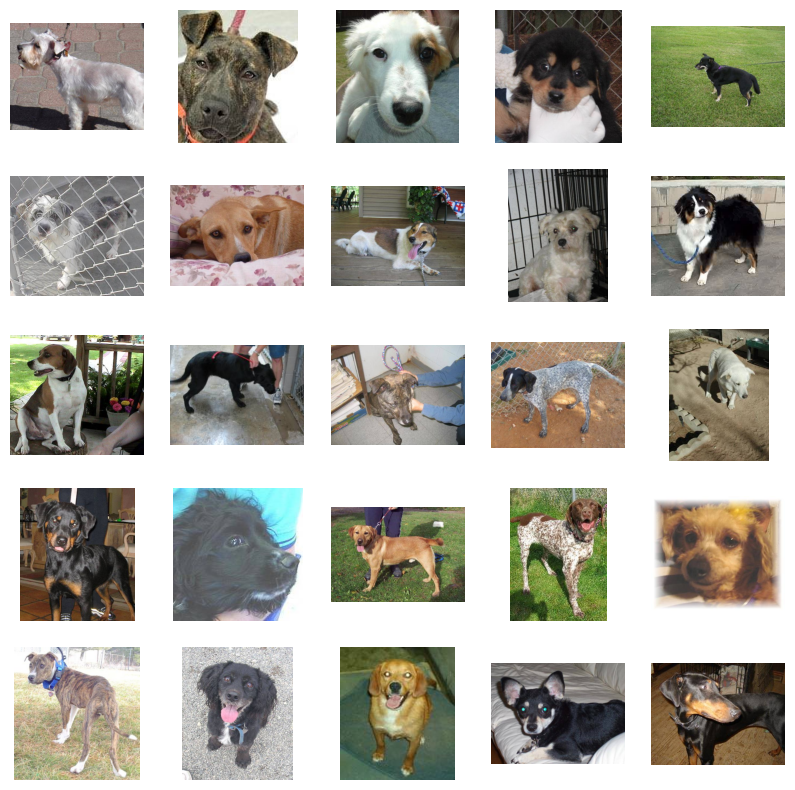

In [90]:
plt.subplots(figsize=(10,10))
for i in range(len(dogs)):
    plt.subplot(5,5,i+1)
    img=plt.imread(dogs.iloc[i])
    plt.imshow(img)
    plt.axis("off")

In [91]:
df = df.sample(frac=1).reset_index(drop=True)

<Axes: xlabel='labels'>

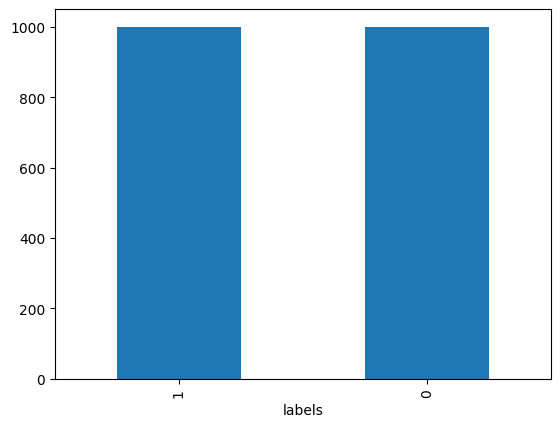

In [93]:
df["labels"].value_counts().plot(kind="bar")

# Train_test_split


In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df["images"],df["labels"],test_size=0.2,random_state=42)

In [98]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [99]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_gen = ImageDataGenerator(
    rescale = 1./255
)

train_iterator = train_gen.flow_from_dataframe(
    dataframe = df,
    x_col = "images",
    y_col = "labels",
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = True
)
test_data = test_gen.flow_from_dataframe(
    dataframe = df,
    x_col = "images",
    y_col = "labels",
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = True
)

Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


In [101]:
Model = Sequential()

Model.add(Conv2D(16,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(224,224,3)))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

Model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

Model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

Model.add(Flatten())

Model.add(Dense(128,activation="relu"))
Model.add(Dense(1,activation="sigmoid"))


Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

History = Model.fit(train_iterator,epochs=15,validation_data=test_data)


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 429ms/step - accuracy: 0.5020 - loss: 0.8723 - val_accuracy: 0.5110 - val_loss: 0.6733
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 388ms/step - accuracy: 0.6059 - loss: 0.6507 - val_accuracy: 0.6625 - val_loss: 0.6265
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.6464 - loss: 0.6279 - val_accuracy: 0.6930 - val_loss: 0.5821
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 398ms/step - accuracy: 0.6967 - loss: 0.5782 - val_accuracy: 0.6755 - val_loss: 0.5869
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 385ms/step - accuracy: 0.7115 - loss: 0.5584 - val_accuracy: 0.7435 - val_loss: 0.5256
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 415ms/step - accuracy: 0.7265 - loss: 0.5348 - val_accuracy: 0.7460 - val_loss: 0.5291
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 388ms/step - accuracy: 0.7384 - loss: 0.5297 - val_accuracy: 0.7645 - val_loss: 0.4796
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 388ms/step - accuracy: 0.7588 - loss: 0.4964 - val_accu

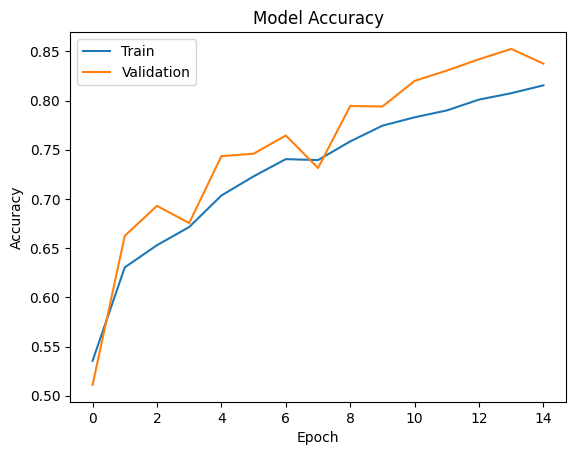

In [104]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

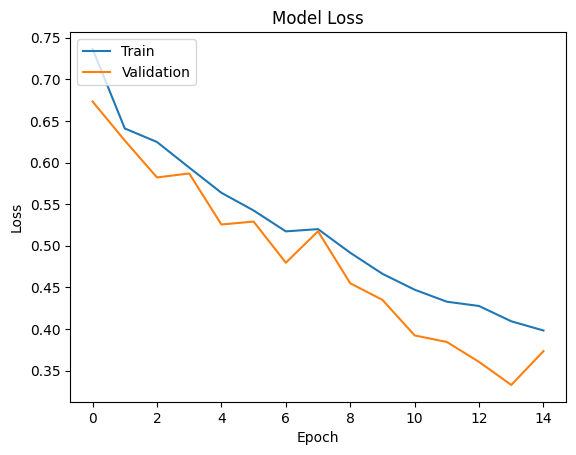

In [105]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model_Evaluation

In [106]:
model_eval = Model.evaluate(test_data)
print(model_eval)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8391 - loss: 0.3798
[0.3734181225299835, 0.8374999761581421]


# predictive_Model

In [115]:
import cv2
import pandas as pd

image_path = df["images"][0]

img = cv2.imread(image_path)

if img is not None:
    img = img / 255.0
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
else:
    print("Error: Image not found or unable to load.")

np.argmax(Model.predict(img))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


0

In [127]:
import cv2
import pandas as pd

image_path = df["images"][313]

img = cv2.imread(image_path)

if img is not None:
    img = img / 255.0
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
else:
    print("Error: Image not found or unable to load.")

In [123]:
df["images"][1700]

'/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/dogs/dog.12411.jpg'

# Predictive_system

In [132]:
from re import M
import cv2
import pandas as pd

image_path = df["images"][313]

img = cv2.imread(image_path)

if img is not None:
    img = img / 255.0
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
else:
    print("Error: Image not found or unable to load.")

#Model prediction
Model_prediction = Model.predict(img)
np.argmax(Model_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


0

In [137]:
df["images"][1100]

'/content/dogs_cats_sample_1000/dogs_cats_sample_1000/train/dogs/dog.6569.jpg'

In [138]:
import pickle
pickle.dump(Model,open("model.pkl","wb"))